nose_tip coordinates [(125, 119), (132, 123), (139, 127), (147, 125), (152, 122)]
nose_bridge coordinates [(146, 80), (144, 92), (143, 105), (142, 117)]
Added_horizontal_distance 9
region(left,upper,right,lower) (116, 89, 161, 134)
pic_size (45, 45)
original nose pic size (396, 400)
nose (45, 45)
A, B, C, degree -7 47 47.51841748206689 8.471144633014832


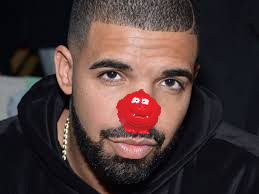

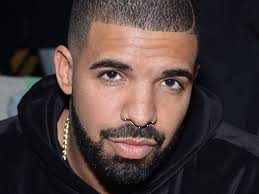

In [92]:
from PIL import Image, ImageDraw
import face_recognition
import math, cv2, numpy as np
from math import acos, degrees, sqrt

# Load the jpg file into a numpy array
# Choose a picture 'richard_curtis.jpg' 'rihanna.jpg' 'ryan_gosling.jpg' 'arnie.jpg' 'drake.jpg' 'kim_kardashian'
image = face_recognition.load_image_file("drake.jpg")
# Choose a noise 'sniffer.png' 'sourcerer.png' 'teeth.png' 'viking.png' 'cook.png' 'djboogy.png' 'drnose.png' 'owl.png'
nose_pic = Image.open('teeth.png', mode='r')

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:
    pil_image = Image.fromarray(image)
    pil_image2 = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image2, 'RGBA')
    
    # Setting point to assess performance
    d.point(face_landmarks['nose_tip'], fill=None)
    d.point(face_landmarks['nose_bridge'], fill=None)
    
print('nose_tip coordinates',face_landmarks['nose_tip'])
print('nose_bridge coordinates',face_landmarks['nose_bridge'])

# Adjustment to region size
Added_horizontal_distance = int((face_landmarks['nose_tip'][4][0] - face_landmarks['nose_tip'][0][0])*0.35)
print('Added_horizontal_distance',Added_horizontal_distance )
Added_vertical_distance = int((face_landmarks['nose_bridge'][3][1] - face_landmarks['nose_bridge'][0][1])*0.20)

# left part of the nose tip, adding -5 as the picture of the nose is smaller than picture size
left = face_landmarks['nose_tip'][0][0] - Added_horizontal_distance
# right part of the nose tip, adding +5 as the picture of the nose is smaller than picture size
right = face_landmarks['nose_tip'][4][0] + Added_horizontal_distance
# lower part of the nose bridge
lower = face_landmarks['nose_tip'][2][1] +Added_vertical_distance
# upper part of the nose bridge, based on lower ground as nose picture is a square
upper = lower - (right-left)


region = (left,upper,right,lower)
print('region(left,upper,right,lower)', region)

#resizing nose_pic to fit region size

new_w = right-left
new_h = new_w
#new_h = lower-upper
print("pic_size",(new_w,new_h))

print('original nose pic size', nose_pic.size)

nose_pic = nose_pic.resize((new_w, new_h), Image.ANTIALIAS)
test = nose_pic.size
print('nose',test)

# Adjust pic to rotate with original picture
A = lower = face_landmarks['nose_tip'][2][0] - face_landmarks['nose_bridge'][0][0]
B = lower = face_landmarks['nose_tip'][2][1] - face_landmarks['nose_bridge'][0][1]
C = sqrt(A**2 + B**2)
degree = degrees(acos((B / C)))
print('A, B, C, degree', A, B, C, degree)
nose_pic = nose_pic.rotate(-degree)

# Paste nose to picture
pil_image.paste(nose_pic, box=region,mask=nose_pic )


#pil_image.show()
#pil_image2.show()

from IPython.display import HTML, display
display(pil_image, pil_image2)
